## Importing required modules

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# for visulations
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and Understanding Data

In [2]:
leads=pd.read_csv('Leads.csv')

In [3]:
print(leads.shape)
leads.head()

(9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
leads.isnull().sum(axis=0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

 - ### Observations -
    a. There are columns where we see many null values. Such as 
        1. Country - 26.63%
        2. Specialization - 15.56%
        3. How did you hear about X Education - 23.89%
        4. What is your current occupation - 29.11%
        5. What matters most to you in choosing a course - 29.32%
        6. Tags - 36.29%
        7. Lead Quality - 51.59%
        8. Lead Profile - 29.32%
        9. Asymmetrique Activity Index- 45.65%
        10. Asymmetrique Profile Index - 45.65%
        11. Asymmetrique Activity Score - 45.65%
        12. Asymmetrique Profile Score - 45.65%
    b. We need to carefully examine them for further processing.

### Cleaning the Data

In [7]:
# Dropping the Prospect ID and Lead number since they possess unique identifier.
leads= leads.drop(['Prospect ID','Lead Number'],axis=1)

In [8]:
# Dropping columns where we have many null values
leads= leads.drop(['Country','City','Asymmetrique Activity Index','Asymmetrique Profile Index',
                   'Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','Tags'],axis=1)

In [9]:
## Based on analysis, dropping the columns which do not have any variation.
leads= leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                   'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [10]:
# Let's check the null values in column NewsPaper
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [11]:
# Based on analysis, dropping the Newspaper column, since it does not have any variation.
leads= leads.drop(['Newspaper'],axis=1)

In [12]:
# Let's check the null values in column 'NewsPaper Article'
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [13]:
# Based on analysis, dropping the 'Newspaper Article' column, since it does not have any variation.
leads= leads.drop(['Newspaper Article'],axis=1)

In [14]:
# Let's check the null values in column 'X Education Forums'
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [15]:
# Based on analysis, dropping the 'X Education Forums' column, since it does not have any variation.
leads= leads.drop(['X Education Forums'],axis=1)

In [16]:
# Let's check the null values in column Lead Profile
round(100*(leads['Lead Profile'].value_counts(dropna=False)/len(leads.index)),2)

Select                         44.87
NaN                            29.32
Potential Lead                 17.46
Other Leads                     5.27
Student of SomeSchool           2.61
Lateral Student                 0.26
Dual Specialization Student     0.22
Name: Lead Profile, dtype: float64

In [17]:
## Based on analysis of Lead Profile column, Select and null values contributes more than 70%. Hence we will drop it.
leads= leads.drop(['Lead Profile'],axis=1)

In [18]:
# Let's check the null values in column How did you hear about X Education
round(100*(leads['How did you hear about X Education'].value_counts(dropna=False)/len(leads.index)),2)

Select                   54.58
NaN                      23.89
Online Search             8.74
Word Of Mouth             3.77
Student of SomeSchool     3.35
Other                     2.01
Multiple Sources          1.65
Advertisements            0.76
Social Media              0.73
Email                     0.28
SMS                       0.25
Name: How did you hear about X Education, dtype: float64

In [19]:
## Based on analysis of How did you hear about X Education column, Select and null values contributes more than 75%. 
#Hence we will drop it.
leads= leads.drop(['How did you hear about X Education'],axis=1)

In [20]:
# Let's check the null values in column How did you hear about X Education
round(100*(leads['Specialization'].value_counts(dropna=False)/len(leads.index)),2)

Select                               21.02
NaN                                  15.56
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Media and Advertising                 2.20
Travel and Tourism                    2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

In [21]:
## Based on analysis of 'Specialization' column, Select and null values contributes more than 36%. 
#Hence we will drop it.
leads= leads.drop(['Specialization'],axis=1)

### Imputing the values

In [22]:
## Occupation is important information to keep. So imputing nan values to others 
leads['What is your current occupation']=leads['What is your current occupation'].replace(to_replace=np.nan,value='Other')

In [23]:
# TotalVisits 1.~1.5% nan values. Let's check the stats of this column.
leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [24]:
# Based on TotalVisits stats, we can impute nan values with median value 3.0
leads['TotalVisits']=leads['TotalVisits'].replace(to_replace=[np.nan],value=3.0)

In [25]:
# TotalVisits 1.~1.5% nan values. Let's check the stats of this comumn.
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [26]:
# Based on Page Views Per Visit stats, we can impute nan values with median value 2.0
leads['Page Views Per Visit']=leads['Page Views Per Visit'].replace(to_replace=[np.nan],value=2.0)

In [27]:
## Last Activity has nearly 1.1 % null values and it is important information to keep. So imputing nan values to others 
leads['Last Activity']=leads['Last Activity'].replace(to_replace=[np.nan],value='Other')

In [28]:
#round(100*(leads['What matters most to you in choosing a course'].value_counts(dropna=False)/len(leads.index)),2)
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
# Based on TotalVisits stats, we can impute nan values with median value 3.0
leads['What matters most to you in choosing a course']=leads['What matters most to you in choosing a course'].replace(to_replace=[np.nan],value='Other')

In [30]:
# Filling the NaN values which is 0.39% in the 'lead Source' column with Google as it is very popular
leads.loc[pd.isnull(leads['Lead Source']),['Lead Source']]='Google'

### Data Preparation

In [31]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9240 non-null float64
Last Activity                                    9240 non-null object
What is your current occupation                  9240 non-null object
What matters most to you in choosing a course    9240 non-null object
Search                                           9240 non-null object
Digital Advertisement                            9240

In [32]:
## Based on analysis, below columns contain values Yes or No. So replacing them with 1 or 0
varlist=['Search','Digital Advertisement','Through Recommendations','Do Not Email','Do Not Call',
         'A free copy of Mastering The Interview']

In [33]:
## Yes & No values converted to 1 & 0
leads[varlist]=leads[varlist].replace(to_replace={'No':0,'Yes':1})

In [34]:
leads.head(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,0,0,0,Modified
5,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,Other,Other,0,0,0,0,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,Unemployed,Better Career Prospects,0,0,0,0,Modified
7,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,Other,Other,0,0,0,0,Modified
8,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.0,Email Opened,Other,Other,0,0,0,1,Email Opened
9,API,Google,0,0,0,4.0,58,4.0,Email Opened,Other,Other,0,0,0,0,Email Opened


In [35]:
print(leads.shape)
round(100*(leads.isnull().sum()/len(leads.index)),2)

(9240, 16)


Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

In [36]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null int64
Do Not Call                                      9240 non-null int64
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9240 non-null float64
Last Activity                                    9240 non-null object
What is your current occupation                  9240 non-null object
What matters most to you in choosing a course    9240 non-null object
Search                                           9240 non-null int64
Digital Advertisement                            9240 no

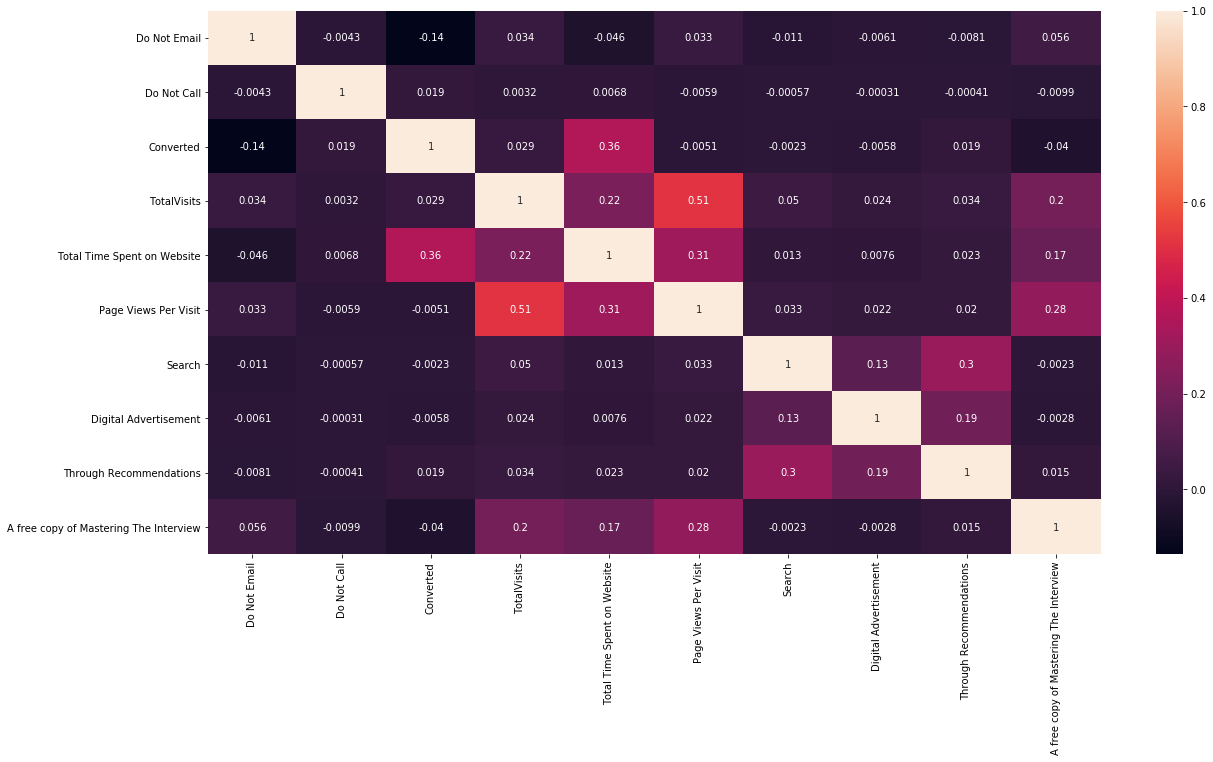

In [37]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

#### Observtions - 
    - Total VIsits seems highly corelated with Page views per visit.

### Outlier Treatment

In [38]:
# Checking for outliers in the continuous variables
leads_temp = leads[['TotalVisits','Page Views Per Visit','Total Time Spent on Website' ]]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads_temp.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9240.000000,9240.000000,9240.000000
mean,3.438636,2.357440,487.698268
std,4.819024,2.145781,548.021466
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,3.000000,2.000000,248.000000
75%,5.000000,3.000000,936.000000
90%,7.000000,5.000000,1380.000000
95%,10.000000,6.000000,1562.000000
99%,17.000000,9.000000,1840.610000


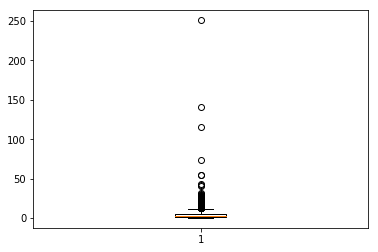

In [39]:
# Outlier Treatment
plt.boxplot(leads['TotalVisits'])
Q1 =leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

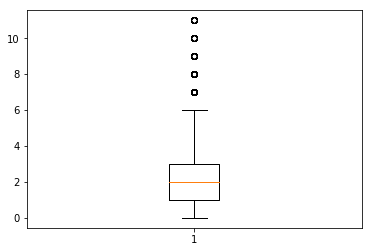

In [40]:
# Outlier Treatment
plt.boxplot(leads['Page Views Per Visit'])
Q1 =leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

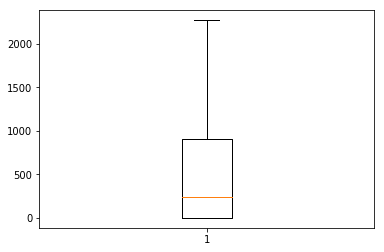

In [41]:
# Outlier Treatment
plt.boxplot(leads['Total Time Spent on Website'])
Q1 =leads['Total Time Spent on Website'].quantile(0.25)
Q3 = leads['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (leads['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]

In [42]:
leads.shape

(8679, 16)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd6aa55cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd6aa67550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd6aa55748>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd6aa67da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd6aa67e80>],
 'means': []}

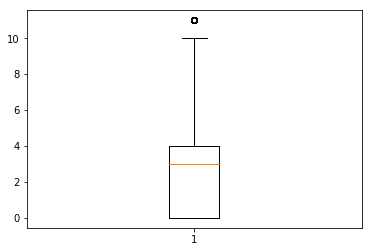

In [43]:
plt.boxplot(leads['TotalVisits'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd6a686ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd6a68e780>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd6a686978>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd6a68efd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd6a697438>],
 'means': []}

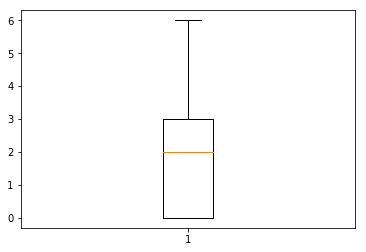

In [44]:
plt.boxplot(leads['Page Views Per Visit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd6a6e85c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd6a6e8e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd6a6e8048>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd6a6f06a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd6a6f0ac8>],
 'means': []}

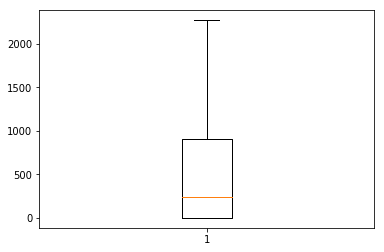

In [45]:
plt.boxplot(leads['Total Time Spent on Website'])

### Dummy Variables

In [46]:
# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads['Lead Origin'], prefix='Lead_Origin',drop_first=True)

# Concat the dummy varibale created dataframe to the original dataframe
leads = pd.concat([leads,lo], axis=1)

# Drop column whose dummy variable is created.
leads.drop(['Lead Origin'], axis = 1, inplace = True)

In [47]:
# Creating dummy variables for the variable 'Lead Origin'
ls = pd.get_dummies(leads['Lead Source'], prefix='Lead_Source',drop_first=True)

# Concat the dummy varibale created dataframe to the original dataframe
leads = pd.concat([leads,ls], axis=1)

# Drop column whose dummy variable is created.
leads.drop(['Lead Source'], axis = 1, inplace = True)

In [48]:
# Creating dummy variables for the variable 'Lead Origin'
last_activity = pd.get_dummies(leads['Last Notable Activity'], prefix='Last_notable_Activity',drop_first=True)

# Concat the dummy varibale created dataframe to the original dataframe
leads = pd.concat([leads,last_activity], axis=1)

# Drop column whose dummy variable is created.
leads.drop(['Last Notable Activity'], axis = 1, inplace = True)

In [49]:
# Creating dummy variables for the variable 'Lead Origin'
last_activity = pd.get_dummies(leads['Last Activity'], prefix='Last_Activity',drop_first=True)

# Concat the dummy varibale created dataframe to the original dataframe
leads = pd.concat([leads,last_activity], axis=1)

# Drop column whose dummy variable is created.
leads.drop(['Last Activity'], axis = 1, inplace = True)

In [50]:
# Creating dummy variables for the variable 'Lead Origin'
current_occupation = pd.get_dummies(leads['What is your current occupation'], prefix='current_occupation',drop_first=True)

# Concat the dummy varibale created dataframe to the original dataframe
leads = pd.concat([leads,current_occupation], axis=1)

# Drop column whose dummy variable is created.
leads.drop(['What is your current occupation'], axis = 1, inplace = True)

In [51]:
# Creating dummy variables for the variable 'Lead Origin'
course_matters = pd.get_dummies(leads['What matters most to you in choosing a course'], prefix='course_matters',drop_first=True)

# Concat the dummy varibale created dataframe to the original dataframe
leads = pd.concat([leads,course_matters], axis=1)

# Drop column whose dummy variable is created.
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [52]:
print(leads.shape)
leads.info()

(8679, 73)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8679 entries, 0 to 9239
Data columns (total 73 columns):
Do Not Email                                          8679 non-null int64
Do Not Call                                           8679 non-null int64
Converted                                             8679 non-null int64
TotalVisits                                           8679 non-null float64
Total Time Spent on Website                           8679 non-null int64
Page Views Per Visit                                  8679 non-null float64
Search                                                8679 non-null int64
Digital Advertisement                                 8679 non-null int64
Through Recommendations                               8679 non-null int64
A free copy of Mastering The Interview                8679 non-null int64
Lead_Origin_Landing Page Submission                   8679 non-null uint8
Lead_Origin_Lead Add Form                             8679 non-n

### Train and Test data Split

In [53]:
# Putting feature variables to X
X = leads.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,...,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,current_occupation_Housewife,current_occupation_Other,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,course_matters_Flexibility & Convenience,course_matters_Other
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [54]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7, test_size=0.3 , random_state=5)

### Rescaling the features

In [56]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()

In [57]:
# Do feature scaling to all the columns except the 'dummy' variables
varlist_scale=['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

X_train[varlist_scale] = minmax_scaler.fit_transform(X_train[varlist_scale])
print(X_train.shape)
X_train.head()

(6075, 72)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,...,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,current_occupation_Housewife,current_occupation_Other,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,course_matters_Flexibility & Convenience,course_matters_Other
2874,0,0,0.909091,0.215184,0.555000,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
2877,0,0,0.454545,0.082210,0.416667,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4378,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8847,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1421,0,0,0.454545,0.486972,0.833333,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [58]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,...,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,current_occupation_Housewife,current_occupation_Other,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,course_matters_Flexibility & Convenience,course_matters_Other
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,...,6075.000000,6075.000000,6075.0,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000
mean,0.074568,0.000165,0.254800,0.213196,0.344563,0.000988,0.000329,0.000658,0.294156,0.512099,...,0.005761,0.000494,0.0,0.000988,0.297613,0.022222,0.602140,0.076214,0.000329,0.298107
std,0.262714,0.012830,0.218093,0.243642,0.273031,0.031414,0.018143,0.025654,0.455700,0.499895,...,0.075691,0.022219,0.0,0.031414,0.457246,0.147418,0.489497,0.265362,0.018143,0.457464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.272727,0.107817,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.363636,0.407907,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### RFE

In [59]:
# Importing RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',random_state=9)

In [60]:
# Running RFE with the output number of the variable equal to 15
rfe = RFE(logreg, 15)  
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 27),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Search', False, 32),
 ('Digital Advertisement', False, 51),
 ('Through Recommendations', False, 39),
 ('A free copy of Mastering The Interview', False, 43),
 ('Lead_Origin_Landing Page Submission', False, 41),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 46),
 ('Lead_Origin_Quick Add Form', False, 31),
 ('Lead_Source_Direct Traffic', True, 1),
 ('Lead_Source_Facebook', False, 47),
 ('Lead_Source_Google', False, 2),
 ('Lead_Source_Live Chat', False, 48),
 ('Lead_Source_NC_EDM', False, 22),
 ('Lead_Source_Olark Chat', False, 17),
 ('Lead_Source_Organic Search', True, 1),
 ('Lead_Source_Pay per Click Ads', False, 52),
 ('Lead_Source_Press_Release', False, 55),
 ('Lead_Source_Reference', False, 24),
 ('Lead_Source_Referral Sites', True, 1),
 ('Lead_Source_Social Media', False, 16),
 ('Lead_Sou

In [62]:
# Take all column names to col variabled selected by RFE. In our case it is 15
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Direct Traffic',
       'Lead_Source_Organic Search', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website', 'Last_notable_Activity_Unreachable',
       'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_Other',
       'Last_Activity_SMS Sent', 'current_occupation_Housewife',
       'current_occupation_Working Professional', 'course_matters_Other'],
      dtype='object')

In [63]:
rfe.estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=9, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Building the model using statsmodel

In [64]:
# Create new Dataframe only RFE selected columns
X_train_rfe=X_train[col]

In [65]:
print("Original DataFrame Shape", X_train.shape)
print("RFE Selected DataFrame Shape", X_train_rfe.shape)
X_train_rfe.head()

Original DataFrame Shape (6075, 72)
RFE Selected DataFrame Shape (6075, 15)


,Do Not Email,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Organic Search,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_notable_Activity_Unreachable,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Other,Last_Activity_SMS Sent,current_occupation_Housewife,current_occupation_Working Professional,course_matters_Other
2874,0,0.215184,0,0,0,0,0,0,0,0,0,0,0,0,1
2877,0,0.082210,0,0,0,0,0,0,0,0,0,1,0,0,0
4378,0,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,0
8847,0,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0
1421,0,0.486972,0,0,1,0,0,0,0,1,0,0,0,0,1


In [66]:
# Adding a constant variable 
import statsmodels.api as sm  
#X_train_rfe = sm.add_constant(X_train_rfe)
X_train_sm = sm.add_constant(X_train[col])

In [67]:
print(y_train.shape)
print(X_train_sm.shape)

(6075,)
(6075, 16)


In [68]:
# Logistic regression model
binomial_model1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

#Fit the model. This is important step
log_res=binomial_model1.fit()
log_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6059
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.9
Date:                Sun, 03 Mar 2019   Deviance:                       5045.8
Time:                        22:35:37   Pearson chi2:                 5.89e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.5299      0.070    -21.873      0.000      -1.667      -1.393
Do Not Email                               -1.4513      0.176     -8.230      0.000      -1.797      -1.106
Total Time Spent on Website                 3.8547      0.151     25.583      0.000       3.559       4.150
Lead_Origin_Lead Add Form                   2.8665      0.202     14.176      0.000       2.470       3.263
Lead_Source_Direct Traffic                 -0.6630      0.084     -7.875      0.000      -0.828      -0.498
Lead_Source_Organic Search                 -0.5673      0.114     -4.972      0.000      -0.791      -0.344
Lead_Source_Referral Sites                 -0.6297      0.338     -1.865      0.062      -1.292       0.032
Lead_Source_Welingak Website                2.1122      0.742      2.846      0.004       0.657       3.567
Last_notable_Activity_Unreachable           1.8419      0.559      3.292      0.001       0.745       2.938
Last_Activity_Had a Phone Conversation      1.7259      0.683      2.529      0.011       0.388       3.064
Last_Activity_Olark Chat Conversation      -0.8287      0.163     -5.080      0.000      -1.148      -0.509
Last_Activity_Other                        -1.1592      0.426     -2.724      0.006      -1.993      -0.325
Last_Activity_SMS Sent                      1.4178      0.076     18.563      0.000       1.268       1.567
current_occupation_Housewife               22.8746   1.71e+04      0.001      0.999   -3.35e+04    3.36e+04
current_occupation_Working Professional     2.3010      0.181     12.684      0.000       1.945       2.657
course_matters_Other                       -1.2195      0.089    -13.779      0.000      -1.393      -1.046
===========================================================================================================
"""

In [69]:
# Getting the predicted values on the train set
y_train_pred = log_res.predict(X_train_sm)
y_train_pred[:10]

2874    0.127860
2877    0.551004
4378    0.940159
8847    0.086385
1421    0.093777
7304    0.576441
5460    0.906265
2945    0.226263
7291    0.335499
8690    0.178001
dtype: float64

In [70]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12785957, 0.55100391, 0.94015924, 0.08638459, 0.09377684,
       0.57644092, 0.90626531, 0.22626331, 0.33549943, 0.17800136])

In [71]:
# Creating a dataframe with the actual flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['index'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,index
0,0,0.127860,2874
1,1,0.551004,2877
2,1,0.940159,4378
3,0,0.086385,8847
4,1,0.093777,1421


In [72]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,index,predicted
0,0,0.127860,2874,0
1,1,0.551004,2877,1
2,1,0.940159,4378,1
3,0,0.086385,8847,0
4,1,0.093777,1421,0


In [73]:
# Import metrics
from sklearn import metrics
confusion=metrics.confusion_matrix(y_train,y_train_pred_final.predicted)
confusion

array([[3327,  437],
       [ 753, 1558]], dtype=int64)

In [74]:
# Let's check the accuracy Score
metrics.accuracy_score(y_train,y_train_pred_final.predicted)

0.8041152263374486

##### p-value of `current_occupation_Housewife` is more than 0.05. Hence it is insignificant in presence of other variables. We will drop this variable.

In [75]:
X_train_sm2 = X_train_sm.drop(["current_occupation_Housewife"], axis = 1)
X_train_sm2.shape

(6075, 15)

#### Model-2 Rebuilding the model without current_occupation_Housewife

In [76]:
X_train_sm3=sm.add_constant(X_train_sm2)

# Logistic regression model
binomial_model3 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial())

#Fit the model. This is important step
log_res3=binomial_model3.fit()
log_res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6060
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2527.2
Date:                Sun, 03 Mar 2019   Deviance:                       5054.3
Time:                        22:35:37   Pearson chi2:                 5.90e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.5251      0.070    -21.832      0.000      -1.662      -1.388
Do Not Email                               -1.4542      0.176     -8.247      0.000      -1.800      -1.109
Total Time Spent on Website                 3.8542      0.151     25.606      0.000       3.559       4.149
Lead_Origin_Lead Add Form                   2.8738      0.202     14.218      0.000       2.478       3.270
Lead_Source_Direct Traffic                 -0.6648      0.084     -7.900      0.000      -0.830      -0.500
Lead_Source_Organic Search                 -0.5554      0.114     -4.882      0.000      -0.778      -0.332
Lead_Source_Referral Sites                 -0.6320      0.338     -1.872      0.061      -1.294       0.030
Lead_Source_Welingak Website                2.0996      0.742      2.829      0.005       0.645       3.554
Last_notable_Activity_Unreachable           1.8366      0.560      3.281      0.001       0.740       2.934
Last_Activity_Had a Phone Conversation      1.7167      0.683      2.515      0.012       0.379       3.055
Last_Activity_Olark Chat Conversation      -0.8330      0.163     -5.107      0.000      -1.153      -0.513
Last_Activity_Other                        -1.1352      0.423     -2.683      0.007      -1.964      -0.306
Last_Activity_SMS Sent                      1.4128      0.076     18.508      0.000       1.263       1.562
current_occupation_Working Professional     2.2963      0.181     12.659      0.000       1.941       2.652
course_matters_Other                       -1.2225      0.088    -13.818      0.000      -1.396      -1.049
===========================================================================================================
"""

In [77]:
# Getting the predicted values on the train set
y_train_pred3 = log_res3.predict(X_train_sm2)
y_train_pred3 = y_train_pred3.values.reshape(-1)

# Creating a dataframe with the actual flag and the predicted probabilities
y_train_pred_final3 = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred3})
y_train_pred_final3['index'] = y_train.index
y_train_pred_final3.head()

,Converted,Converted_Prob,index
0,0,0.128051,2874
1,1,0.550950,2877
2,1,0.940556,4378
3,0,0.086419,8847
4,1,0.094559,1421


In [78]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final3['predicted'] = y_train_pred_final3.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final3.head()

,Converted,Converted_Prob,index,predicted
0,0,0.128051,2874,0
1,1,0.550950,2877,1
2,1,0.940556,4378,1
3,0,0.086419,8847,0
4,1,0.094559,1421,0


In [79]:
# Let's check the accuracy Score
metrics.accuracy_score(y_train,y_train_pred_final3.predicted)

0.8036213991769547

##### Accuracy score has changed marginally
##### p-value of all variables is zero which are significant. We will calculate the multicolinearity (VIF).

In [80]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm3.values, i) for i in range(X_train_sm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.40
3,Lead_Origin_Lead Add Form,1.61
7,Lead_Source_Welingak Website,1.26
4,Lead_Source_Direct Traffic,1.19
10,Last_Activity_Olark Chat Conversation,1.17
11,Last_Activity_Other,1.17
2,Total Time Spent on Website,1.15
14,course_matters_Other,1.13
5,Lead_Source_Organic Search,1.11
12,Last_Activity_SMS Sent,1.11


##### VIF values of all variables are less than 5 except constant.
##### We will drop `const` variable now.

In [81]:
X_train_sm_final = X_train_sm3.drop(['const'], axis=1)

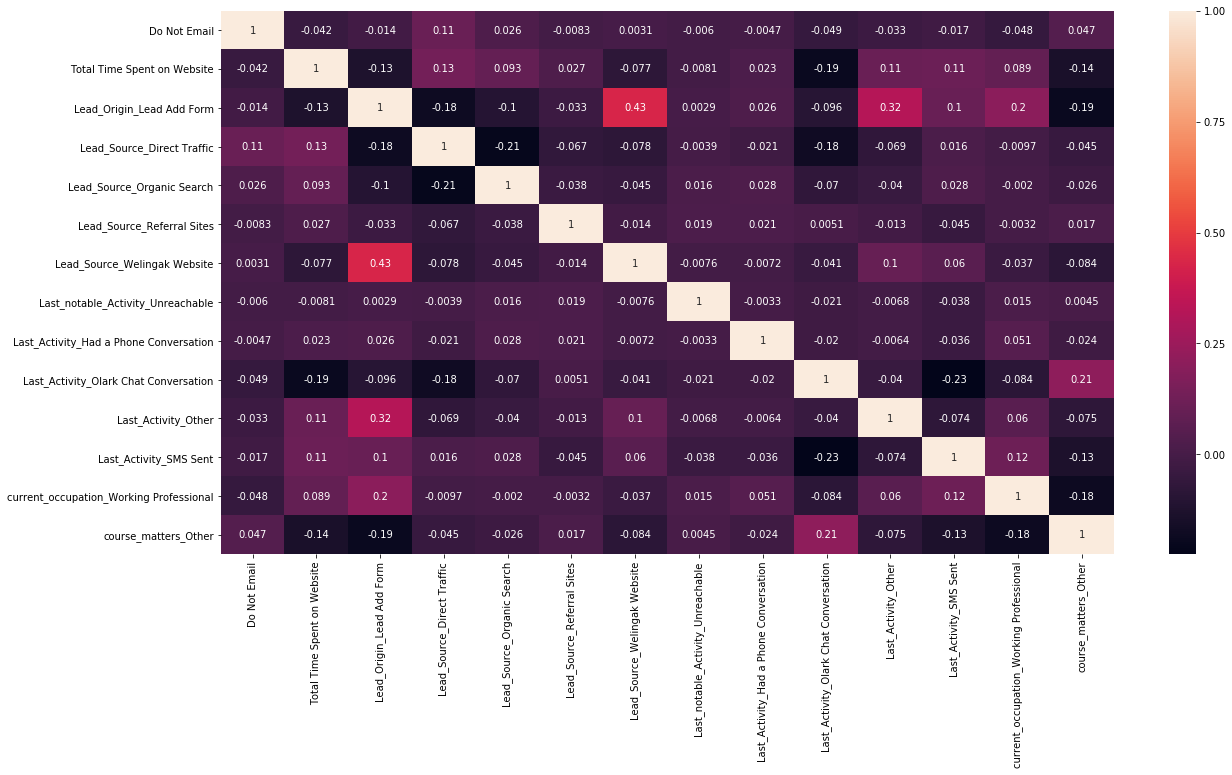

In [82]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train_sm_final.corr(),annot = True)
plt.show()

#### Observtions - Heatmap shows all variables co-relation is less.

### Subjective Questions - 1 Top 2 Numeric variables
    1) Total time spent on Website.
    2) Total Visits

### Subjective Questions - 2 Top 3 Categorical/Dummy variables
    1) Lead_Origin_Lead Add Form
    2) Current_occupation_Working Professional
    3) Lead_Source_Welingak Website

### Lead Score on Train Dataset

In [83]:
y_train_pred_final3['Lead_Score']= y_train_pred_final3['Converted_Prob']*100
y_train_pred_final3.head()

,Converted,Converted_Prob,index,predicted,Lead_Score
0,0,0.128051,2874,0,12.805134
1,1,0.550950,2877,1,55.095026
2,1,0.940556,4378,1,94.055619
3,0,0.086419,8847,0,8.641898
4,1,0.094559,1421,0,9.455936


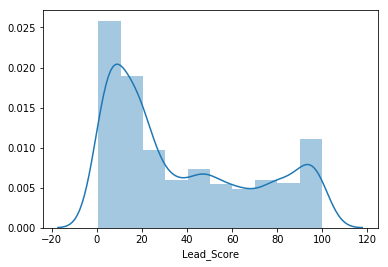

In [84]:
temp_train=y_train_pred_final3['Lead_Score']
sns.distplot(temp_train, hist=True, bins=10, kde=True)

### ROC

In [85]:
# Let's plot the ROC
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_pred_final3.Converted_Prob , drop_intermediate = False)

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(13, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

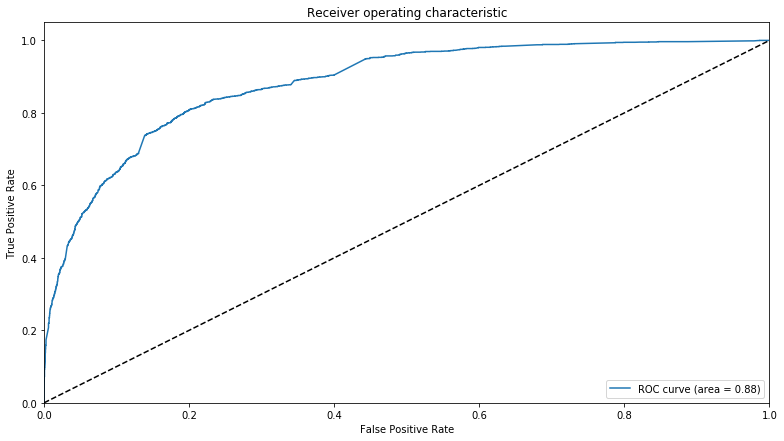

In [87]:
draw_roc(y_train_pred_final3.Converted,y_train_pred_final3.Converted_Prob)

In [88]:
# Let's plot the F1- Score
metrics.f1_score(y_train,y_train_pred_final3.predicted)

0.7230090550267008

In [89]:
metrics.r2_score(y_train,y_train_pred_final.predicted)

0.16891836897046952

#### Let's find Optimal Cutoff Point

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final3[i]= y_train_pred_final3.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final3.head()

,Converted,Converted_Prob,index,predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.128051,2874,0,12.805134,1,1,0,0,0,0,0,0,0,0
1,1,0.550950,2877,1,55.095026,1,1,1,1,1,1,0,0,0,0
2,1,0.940556,4378,1,94.055619,1,1,1,1,1,1,1,1,1,1
3,0,0.086419,8847,0,8.641898,1,0,0,0,0,0,0,0,0,0
4,1,0.094559,1421,0,9.455936,1,0,0,0,0,0,0,0,0,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final3.Converted, y_train_pred_final3[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380412  1.000000  0.000000
0.1   0.1  0.611687  0.981826  0.384431
0.2   0.2  0.736790  0.893553  0.640542
0.3   0.3  0.793909  0.834704  0.768863
0.4   0.4  0.805761  0.772826  0.825983
0.5   0.5  0.803621  0.673734  0.883369
0.6   0.6  0.798189  0.594115  0.923486
0.7   0.7  0.783374  0.511900  0.950053
0.8   0.8  0.751276  0.392038  0.971838
0.9   0.9  0.716708  0.273042  0.989107


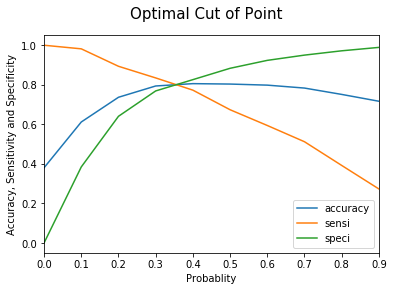

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.suptitle('Optimal Cut of Point', fontsize = 15)
plt.xlabel('Probablity', fontsize = 10)
plt.ylabel('Accuracy, Sensitivity and Specificity', fontsize = 10)
plt.show()

### Observations from Graph
    1) ~0.35 Probability is optimum point where Accuracy, Sensitivity and Specificity is optimum.
    2) X-Education CEO requirement is to have ball park 80% conversion Rate
    3) To achieve it, we need set the Cut-off Probability to ~0.55

### Let's Achieve 80% ball park Conversion Rate with Probablity of 0.55

In [93]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.35 else 0
y_train_pred_final3['predicted'] = y_train_pred_final3.Converted_Prob.map(lambda x: 1 if x > 0.55 else 0)

# Let's see the head
y_train_pred_final3.head()

,Converted,Converted_Prob,index,predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.128051,2874,0,12.805134,1,1,0,0,0,0,0,0,0,0
1,1,0.550950,2877,1,55.095026,1,1,1,1,1,1,0,0,0,0
2,1,0.940556,4378,1,94.055619,1,1,1,1,1,1,1,1,1,1
3,0,0.086419,8847,0,8.641898,1,0,0,0,0,0,0,0,0,0
4,1,0.094559,1421,0,9.455936,1,0,0,0,0,0,0,0,0,0


In [94]:
# Accuracy Score with probablity of 0.35.
metrics.accuracy_score(y_train,y_train_pred_final3.predicted)

0.799835390946502

In [95]:
# Precision score based on probablity of 0.35
metrics.precision_score(y_train_pred_final3.Converted, y_train_pred_final3.predicted)

0.797716150081566

In [96]:
# Recall score based on probablity of 0.35
metrics.recall_score(y_train_pred_final3.Converted, y_train_pred_final3.predicted)

0.6347901341410644

### Confusion Matrix Analysis

In [97]:
confusion=metrics.confusion_matrix(y_train_pred_final3.Converted, y_train_pred_final3.predicted)
confusion

array([[3392,  372],
       [ 844, 1467]], dtype=int64)

In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6347901341410644

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.9011689691817216

In [101]:
# Calculate false postive rate - predicting converted when customer does not have get converted
print(FP/ float(TN+FP))

0.09883103081827843


In [102]:
# positive predictive value 
print (TP / float(TP+FP))

0.797716150081566


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8007554296506137


#### Precision and Recall Tradeoff

In [104]:
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final3.Converted, y_train_pred_final3.Converted_Prob)

<Figure size 432x288 with 0 Axes>

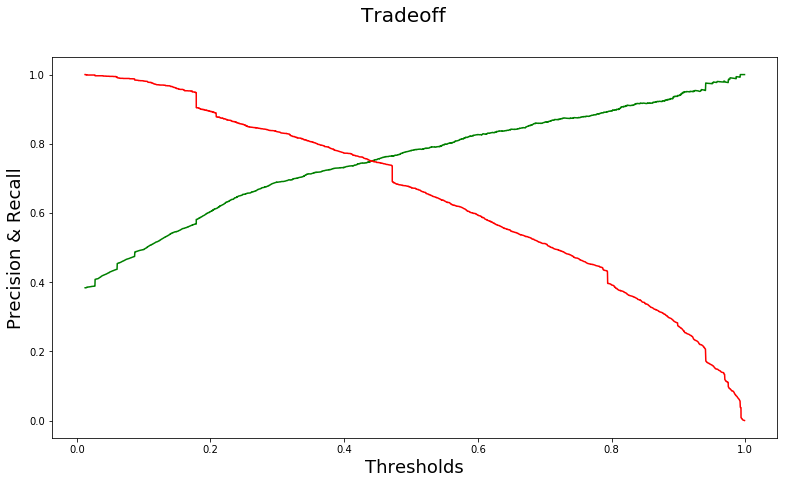

In [105]:
ax = plt.figure()
plt.figure(figsize=(13, 7))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.suptitle('Tradeoff', fontsize = 20)
plt.xlabel('Thresholds', fontsize = 18)
plt.ylabel('Precision & Recall', fontsize = 18)

#plt.add_legend(title='Precision and Recall', labels=['Precision','Recall'], bbox_to_anchor=(0.8, 0.5),fontsize='medium',frameon=True)
plt.show()

## Let's make the predictions on test set

In [106]:
# Scaling the test data. This step is similar to train data. Using same 'varlist_scale' list which is used in train.
X_test[varlist_scale] = minmax_scaler.fit_transform(X_test[varlist_scale])
print(X_test.shape)
X_test.head()

(2604, 72)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,...,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,current_occupation_Housewife,current_occupation_Other,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,course_matters_Flexibility & Convenience,course_matters_Other
4282,0,0,0.181818,0.165053,0.333333,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4483,0,0,0.363636,0.545335,0.666667,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2427,0,0,0.545455,0.051056,0.500000,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9150,1,0,0.090909,0.351673,0.166667,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
3111,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [107]:
# Create new DataFrame. Here we need to select the final trained model columns.
# IN our case, after removing constant, we have final list of columns are available in 'X_train_sm_final'  DataFrame
X_test_rfe=X_test[X_train_sm_final.columns]

In [108]:
print("Original DataFrame Shape", X_test.shape)
print("RFE Selected DataFrame Shape", X_test_rfe.shape)
X_test_rfe.head()

Original DataFrame Shape (2604, 72)
RFE Selected DataFrame Shape (2604, 14)


,Do Not Email,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Organic Search,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_notable_Activity_Unreachable,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Other,Last_Activity_SMS Sent,current_occupation_Working Professional,course_matters_Other
4282,0,0.165053,0,0,1,0,0,0,0,0,0,0,0,0
4483,0,0.545335,0,0,0,0,0,0,0,0,0,1,0,0
2427,0,0.051056,0,0,0,0,0,0,0,0,0,1,1,0
9150,1,0.351673,0,1,0,0,0,0,0,0,0,0,0,1
3111,0,0.000000,0,0,0,0,0,0,0,1,0,0,0,1


In [109]:
# Adding a constant variable 
X_test_sm = sm.add_constant(X_test_rfe)
#Making prediction on our final model 'log_res3' on test data
y_test_pred = log_res3.predict(X_test_sm)

In [110]:
y_test_pred[:10]

4282    0.190869
4483    0.879689
2427    0.915350
9150    0.028994
3111    0.027101
75      0.407793
6335    0.437564
4305    0.627244
8854    0.196269
2456    0.044174
dtype: float64

In [111]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
4282,0.190869
4483,0.879689
2427,0.915350
9150,0.028994
3111,0.027101


In [112]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting index
y_test_df['index'] = y_test_df.index

In [113]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [114]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [115]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,index,Converted_Prob
0,0,4282,0.190869
1,0,4483,0.879689
2,1,2427,0.915350
3,0,9150,0.028994
4,0,3111,0.027101


In [116]:
# Creating new column 'final_predicted' with 1 if COnverted_Prob > 0.35 else 0
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_pred_final.head()

,Converted,index,Converted_Prob,final_predicted
0,0,4282,0.190869,0
1,0,4483,0.879689,1
2,1,2427,0.915350,1
3,0,9150,0.028994,0
4,0,3111,0.027101,0


In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7956989247311828

### Lead Score on Test Dataset

In [118]:
y_pred_final['Lead_Score']= y_pred_final['Converted_Prob']*100
y_pred_final.head()

,Converted,index,Converted_Prob,final_predicted,Lead_Score
0,0,4282,0.190869,0,19.086910
1,0,4483,0.879689,1,87.968945
2,1,2427,0.915350,1,91.535014
3,0,9150,0.028994,0,2.899370
4,0,3111,0.027101,0,2.710127


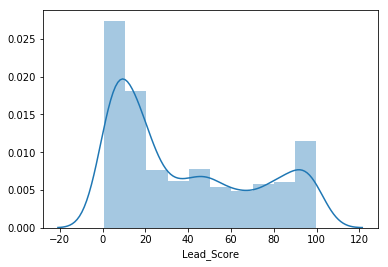

In [119]:
temp_test=y_pred_final['Lead_Score']
sns.distplot(temp_test, hist=True, bins=10, kde=True)

### Confusion Matrix

In [120]:
confusion2=metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1429,  154],
       [ 378,  643]], dtype=int64)

In [121]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

#### Sensitivity when cutoff is 0.55

In [122]:
# Let's see the sensitivity of our logistic regression model
TP2 / float(TP2+FN2)

0.6297747306562194

#### Specificity when cutoff is 0.55

In [123]:
# Let us calculate specificity
TN2 / float(TN2+FP2)

0.9027163613392293

#### FPR when cutoff is 0.55

In [124]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP2/ float(TN2+FP2))

0.0972836386607707


#### Precison when cutoff is 0.55

In [125]:
# Precison - positive predictive value 
print (TP2 / float(TP2+FP2))

0.8067754077791719


In [126]:
# Negative predictive value
print (TN2 / float(TN2+ FN2))

0.7908135030437189


### Subjective Questions - 3 (Lead Conversion Aggressive)

In [127]:
y_pred_final_agg_lead=y_pred_final

In [128]:
# Creating new column 'final_predicted' with 1 if Converted_Prob > 0.10 else 0
y_pred_final_agg_lead['final_predicted'] = y_pred_final_agg_lead.Converted_Prob.map(lambda x: 1 if x > 0.10 else 0)
y_pred_final_agg_lead.head()

,Converted,index,Converted_Prob,final_predicted,Lead_Score
0,0,4282,0.190869,1,19.086910
1,0,4483,0.879689,1,87.968945
2,1,2427,0.915350,1,91.535014
3,0,9150,0.028994,0,2.899370
4,0,3111,0.027101,0,2.710127


In [129]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final_agg_lead.Converted, y_pred_final_agg_lead.final_predicted)

0.6382488479262672

### Confusion Matrix

In [130]:
confusion_agg_lead=metrics.confusion_matrix(y_pred_final_agg_lead.Converted, y_pred_final_agg_lead.final_predicted)
confusion_agg_lead

array([[664, 919],
       [ 23, 998]], dtype=int64)

In [131]:
TP_agg_lead = confusion_agg_lead[1,1] # true positive 
TN_agg_lead = confusion_agg_lead[0,0] # true negatives
FP_agg_lead = confusion_agg_lead[0,1] # false positives
FN_agg_lead = confusion_agg_lead[1,0] # false negatives

#### Sensitivity when cutoff is Aggressive

In [132]:
# Let's see the sensitivity of our logistic regression model
TP_agg_lead / float(TP_agg_lead+FN_agg_lead)

0.9774730656219393

#### Specificity when cutoff is Aggressive

In [133]:
# Let us calculate specificity
TN_agg_lead / float(TN_agg_lead+FP_agg_lead)

0.41945672773215414

#### FPR when cutoff is Aggressive

In [134]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP_agg_lead/ float(TN_agg_lead+FP_agg_lead))

0.5805432722678459


#### Precision when cutoff is Aggressive

In [135]:
# Precision - positive predictive value 
print (TP_agg_lead / float(TP_agg_lead+FP_agg_lead))

0.520605112154408


In [136]:
# Negative predictive value
print (TN_agg_lead / float(TN_agg_lead+ FN_agg_lead))

0.9665211062590975


### Subjective Questions - 4 (Lead Conversion Less Aggressive)

In [137]:
y_pred_no_agg_lead=y_pred_final

In [138]:
# Creating new column 'final_predicted' with 1 if Converted_Prob > 0.85 else 0
y_pred_no_agg_lead['final_predicted'] = y_pred_no_agg_lead.Converted_Prob.map(lambda x: 1 if x > 0.75 else 0)
y_pred_no_agg_lead.head()

,Converted,index,Converted_Prob,final_predicted,Lead_Score
0,0,4282,0.190869,0,19.086910
1,0,4483,0.879689,1,87.968945
2,1,2427,0.915350,1,91.535014
3,0,9150,0.028994,0,2.899370
4,0,3111,0.027101,0,2.710127


In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_no_agg_lead.Converted, y_pred_no_agg_lead.final_predicted)

0.7711213517665131

### Confusion Matrix

In [140]:
confusion_no_agg_lead=metrics.confusion_matrix(y_pred_no_agg_lead.Converted, y_pred_no_agg_lead.final_predicted)
confusion_no_agg_lead

array([[1520,   63],
       [ 533,  488]], dtype=int64)

In [141]:
TP_no_agg_lead = confusion_no_agg_lead[1,1] # true positive 
TN_no_agg_lead = confusion_no_agg_lead[0,0] # true negatives
FP_no_agg_lead = confusion_no_agg_lead[0,1] # false positives
FN_no_agg_lead = confusion_no_agg_lead[1,0] # false negatives

#### Sensitivity when cutoff is Less Aggressive

In [142]:
# Let's see the sensitivity of our logistic regression model
TP_no_agg_lead / float(TP_no_agg_lead+FN_no_agg_lead)

0.4779627815866797

#### Specificity when cutoff is Less Aggressive

In [143]:
# Let us calculate specificity
TN_no_agg_lead / float(TN_no_agg_lead+FP_no_agg_lead)

0.9602021478205938

#### FPR when cutoff is less Aggressive

In [144]:
# Calculate false postive rate - predicting converted when customer does not get converted
print(FP_no_agg_lead/ float(TN_no_agg_lead+FP_no_agg_lead))

0.03979785217940619


#### Precision when cutoff is less Aggressive

In [145]:
# Precision - positive predictive value 
print (TP_no_agg_lead / float(TP_no_agg_lead+FP_no_agg_lead))

0.8856624319419237


In [146]:
# Negative predictive value
print (TN_no_agg_lead / float(TN_no_agg_lead+ FN_no_agg_lead))

0.7403799318071116
